In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/coursewoork/bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows before : {duplicate_count}")

Total duplicate rows before : 12


In [ ]:
#drop the duplicates
df_cleaned = df.drop_duplicates()
print(f"Duplicate rows after: {df_cleaned.duplicated().sum()}")

Duplicate rows after: 0


In [ ]:
#checking the null values
print(f"missing values per column: \n{df.isnull().sum()}")

missing values per column: 
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
# summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Encoding and Standardizing the Dataset

Frequency Encoding the Job column

Note: Treating unknown values as their own distinct category called missing

In [ ]:
# Step 1: Map 'unknown' to 'missing'
df['job'] = df['job'].replace('unknown', 'missing')

# Step 2: Calculate the frequency of each unique value in the 'job' column
job_frequency = df['job'].value_counts() / len(df)  # Frequency of each unique value

# Step 3: Map the frequency to the 'job' column
df['job'] = df['job'].map(job_frequency)  # Replace 'job' with its corresponding frequency

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025736,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.096363,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.096363,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.253035,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.096363,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Filling unkown values in Marital status column with the most frequent value

In [ ]:

# Step 1: Replace 'unknown' in the (marital) column with the most frequent value (mode)
most_frequent_marital = df['marital'].mode()[0]
df['marital'] = df['marital'].replace('unknown', most_frequent_marital)

# Step 2: One-hot encode the (marital) column
df = pd.get_dummies(df, columns=['marital'], drop_first=False)  # Keeping all categories

In [ ]:
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single
0,56,0.025736,basic.4y,no,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
1,57,0.096363,high.school,unknown,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
2,37,0.096363,high.school,no,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
3,40,0.253035,basic.6y,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
4,56,0.096363,high.school,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False


Frequency encoding education column

In [ ]:

# Step 1: Calculate the frequency of each unique value in the education column
education_frequency = df['education'].value_counts() / len(df)  # Frequency of each value

# Step 2: Map the frequency to the education column [Replace (education) with its corresponding frequency]
df['education'] = df['education'].map(education_frequency)


In [ ]:
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single
0,56,0.025736,0.101389,no,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
1,57,0.096363,0.231014,unknown,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
2,37,0.096363,0.231014,no,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
3,40,0.253035,0.055647,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
4,56,0.096363,0.231014,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False


One hot encoding the default column while treating unkown values (converted to missing) as a seperate category

In [ ]:
# Step 1: Replace 'unknown' in the (default) column with a distinct category (missing)
df['default'] = df['default'].replace('unknown', 'missing')

# Step 2: One-hot encode the (default)  column
df = pd.get_dummies(df, columns=['default'], drop_first=False)  # Keeping all categories

In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,no,no,telephone,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,no,no,telephone,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,yes,no,telephone,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,no,no,telephone,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,no,yes,telephone,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


impute the unkown values and label encode the housing column unkown values = 2% of datase (so imputing with frequent value)

In [ ]:


# Step 1: Impute the 'unknown' values in the (housing) column with the most frequent value (mode)
most_frequent_housing = df['housing'].mode()[0]
df['housing'] = df['housing'].replace('unknown', most_frequent_housing)

# Step 2: Label encode the (housing) column
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})


In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,0,no,telephone,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,0,no,telephone,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,1,no,telephone,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,0,no,telephone,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,0,yes,telephone,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


impute the unkown values and label encode the loan column unkown values = 2% of datase (so imputing with frequent value)

In [ ]:
# Step 1: Impute the 'unknown' values in the (housing) column with the most frequent value (mode)
most_frequent_housing = df['loan'].mode()[0]
df['loan'] = df['loan'].replace('unknown', most_frequent_housing)

# Step 2: Label encode the (housing) column
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})


In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,0,0,telephone,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,0,0,telephone,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,1,0,telephone,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,0,0,telephone,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,0,1,telephone,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


label encode contact column (only 2 unique values)

In [ ]:
# Step 1: Label encode the (contact) column
df['contact'] = df['contact'].map({'telephone': 0, 'cellular': 1})


In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,0,0,0,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,0,0,0,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,1,0,0,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,0,0,0,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,0,1,0,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


In [ ]:
#one hot encoding month column
df = pd.get_dummies(df, columns=['month'], drop_first=False)


In [ ]:
df.head()

,age,job,education,housing,loan,contact,day_of_week,duration,campaign,pdays,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0.025736,0.101389,0,0,0,mon,261,1,999,...,False,False,False,False,False,False,True,False,False,False
1,57,0.096363,0.231014,0,0,0,mon,149,1,999,...,False,False,False,False,False,False,True,False,False,False
2,37,0.096363,0.231014,1,0,0,mon,226,1,999,...,False,False,False,False,False,False,True,False,False,False
3,40,0.253035,0.055647,0,0,0,mon,151,1,999,...,False,False,False,False,False,False,True,False,False,False
4,56,0.096363,0.231014,0,1,0,mon,307,1,999,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
#onehot encoding day of week column
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=False)


In [ ]:
df.head()

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0.025736,0.101389,0,0,0,261,1,999,0,...,False,True,False,False,False,False,True,False,False,False
1,57,0.096363,0.231014,0,0,0,149,1,999,0,...,False,True,False,False,False,False,True,False,False,False
2,37,0.096363,0.231014,1,0,0,226,1,999,0,...,False,True,False,False,False,False,True,False,False,False
3,40,0.253035,0.055647,0,0,0,151,1,999,0,...,False,True,False,False,False,False,True,False,False,False
4,56,0.096363,0.231014,0,1,0,307,1,999,0,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
#one hot encoding poutcome column
df = pd.get_dummies(df, columns=['poutcome'], drop_first=False)


In [ ]:
df.head()

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.025736,0.101389,0,0,0,261,1,999,0,...,False,False,False,True,False,False,False,False,True,False
1,57,0.096363,0.231014,0,0,0,149,1,999,0,...,False,False,False,True,False,False,False,False,True,False
2,37,0.096363,0.231014,1,0,0,226,1,999,0,...,False,False,False,True,False,False,False,False,True,False
3,40,0.253035,0.055647,0,0,0,151,1,999,0,...,False,False,False,True,False,False,False,False,True,False
4,56,0.096363,0.231014,0,1,0,307,1,999,0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#label encoding y column
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  float64
 2   education             41188 non-null  float64
 3   housing               41188 non-null  int64  
 4   loan                  41188 non-null  int64  
 5   contact               41188 non-null  int64  
 6   duration              41188 non-null  int64  
 7   campaign              41188 non-null  int64  
 8   pdays                 41188 non-null  int64  
 9   previous              41188 non-null  int64  
 10  emp.var.rate          41188 non-null  float64
 11  cons.price.idx        41188 non-null  float64
 12  cons.conf.idx         41188 non-null  float64
 13  euribor3m             41188 non-null  float64
 14  nr.employed           41188 non-null  float64
 15  y                  

In [ ]:

# Columns to standardize
columns_to_standardize = ['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']

# Initialize and apply the standardization
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize].head())


        age     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  1.533034  0.195414      0.648092        0.722722       0.886447    0.71246   
1  1.628993  0.195414      0.648092        0.722722       0.886447    0.71246   
2 -0.290186  0.195414      0.648092        0.722722       0.886447    0.71246   
3 -0.002309  0.195414      0.648092        0.722722       0.886447    0.71246   
4  1.533034  0.195414      0.648092        0.722722       0.886447    0.71246   

   nr.employed  
0      0.33168  
1      0.33168  
2      0.33168  
3      0.33168  
4      0.33168  


In [ ]:
df.head(10)

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.025736,0.101389,0,0,0,261,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
1,1.628993,0.096363,0.231014,0,0,0,149,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
2,-0.290186,0.096363,0.231014,1,0,0,226,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
3,-0.002309,0.253035,0.055647,0,0,0,151,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
4,1.533034,0.096363,0.231014,0,1,0,307,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
5,0.477486,0.096363,0.146766,0,0,0,198,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
6,1.820911,0.253035,0.127294,0,0,0,139,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
7,0.093650,0.224677,0.042027,0,0,0,217,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
8,-1.537652,0.163713,0.127294,1,0,0,380,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
9,-1.441693,0.096363,0.231014,1,0,0,50,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False


Save the cleaned data(duration is my predicted column for regression task)

In [ ]:
cleaned_file_path = "/content/drive/MyDrive/coursewoork/cleaned_data1.csv"
df.to_csv(cleaned_file_path, index=False)

# Data Visualization

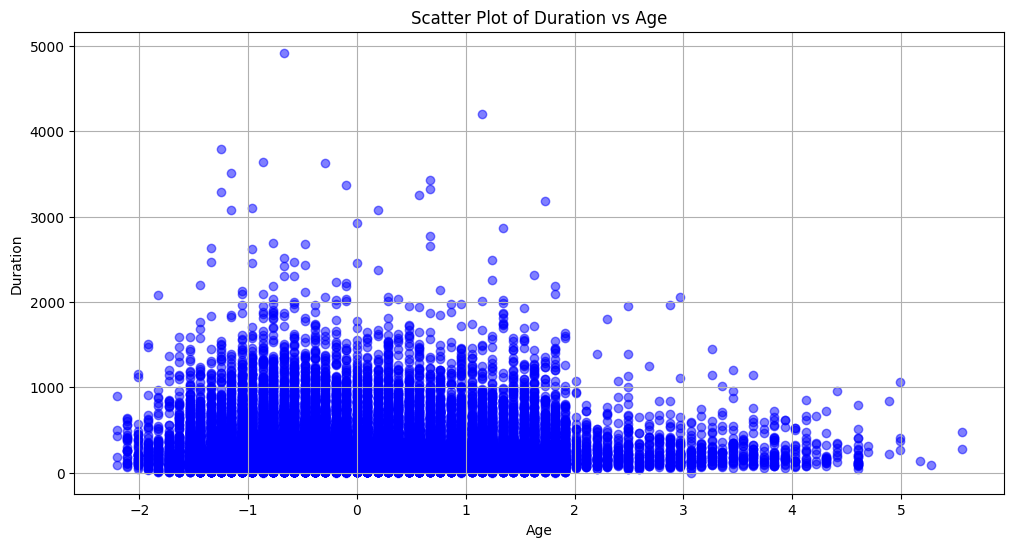

In [ ]:
# Scatter plot of duration vs age
plt.figure(figsize=(12, 6))
plt.scatter(df["age"], df["duration"], alpha=0.5, color="blue")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.title("Scatter Plot of Duration vs Age")
plt.grid(True)
plt.show()


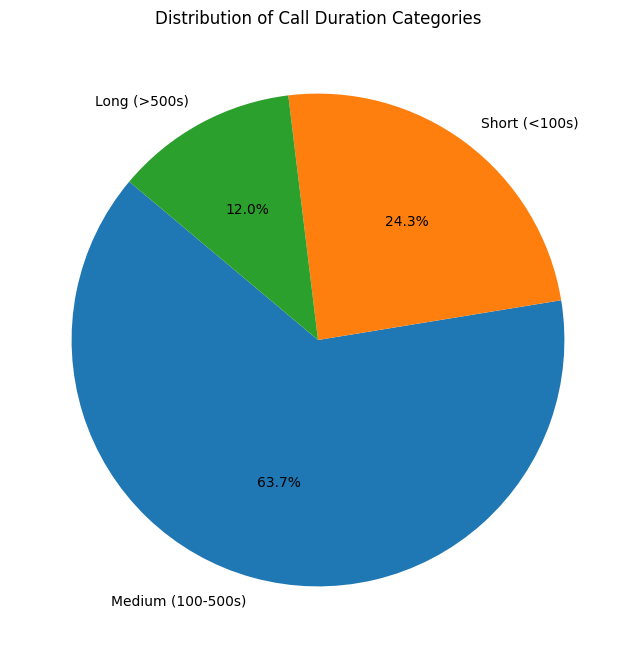

In [ ]:
# Categorizing duration into bins
bins = [0, 100, 500, df["duration"].max()]  # Short, Medium, Long calls
labels = ["Short (<100s)", "Medium (100-500s)", "Long (>500s)"]
df["duration_category"] = pd.cut(df["duration"], bins=bins, labels=labels, include_lowest=True)
duration_counts = df["duration_category"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Call Duration Categories")
plt.show()


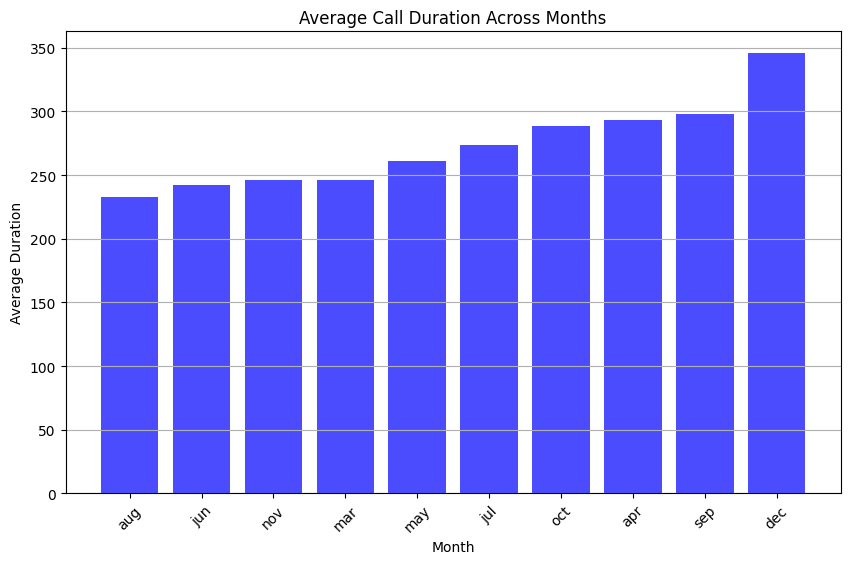

In [ ]:
# Extracting month-wise duration
month_columns = [col for col in df.columns if col.startswith("month_")]
df["month"] = df[month_columns].idxmax(axis=1).str.replace("month_", "")
month_avg_duration = df.groupby("month")["duration"].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(month_avg_duration.index, month_avg_duration.values, color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Duration")
plt.title("Average Call Duration Across Months")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


load the cleaned dataset

In [ ]:
#load the cleaned file
df_cleaned = pd.read_csv('/content/drive/MyDrive/coursewoork/cleaned_data1.csv')
df_cleaned.head()

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.025736,0.101389,0,0,0,261,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
1,1.628993,0.096363,0.231014,0,0,0,149,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
2,-0.290186,0.096363,0.231014,1,0,0,226,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
3,-0.002309,0.253035,0.055647,0,0,0,151,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
4,1.533034,0.096363,0.231014,0,1,0,307,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False


# Build a Model from Scratch(linear Regression)

In [ ]:
#Split Data into Train and Test set

X = df_cleaned.drop(columns=['duration'])
y = df_cleaned['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 39), (8238, 39), (32950,), (8238,))

In [ ]:

# Linear Regression Model
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for epoch in range(self.epochs):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (1/m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        return X.dot(self.theta)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y_pred - y) ** 2)
        rmse = np.sqrt(mse)
        return mse, rmse

In [ ]:
# Convert training data to numpy arrays with type float64
X_train_np = np.array(X_train, dtype=np.float64)
y_train_np = np.array(y_train, dtype=np.float64)

model = LinearRegressionScratch(learning_rate=0.01, epochs=20000)

# Train the model
model.fit(X_train_np, y_train_np)

# Convert X_test to numpy array with type float64
y_pred = model.predict(np.array(X_test, dtype=np.float64))

# Evaluate performance and Convert y_test to numpy array with type float64
mse, rmse = model.evaluate(np.array(X_test, dtype=np.float64), np.array(y_test, dtype=np.float64))
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 52909.50434830597
Root Mean Squared Error: 230.02066069878586


# Build primary model for the Regression

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf}")

Random Forest Mean Squared Error: 48625.76475853043
Random Forest Root Mean Squared Error: 220.51250476680553


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)


mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)


print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Root Mean Squared Error: {rmse_gb}")


Gradient Boosting Mean Squared Error: 47539.718230291466
Gradient Boosting Root Mean Squared Error: 218.036048006497


# Hyper-parameter Optimization with Cross-Validation

For Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    cv=2,  # 2-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the model
random_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [ ]:
# Fit the final Random Forest model
best_rf_model = RandomForestRegressor(
    **best_params, random_state=42
)
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate performance
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
rmse_rf_best = np.sqrt(mse_rf_best)

print("\nFinal Random Forest Model:")
print(f"Mean Squared Error: {mse_rf_best}")
print(f"Root Mean Squared Error: {rmse_rf_best}")


Final Random Forest Model:
Mean Squared Error: 47769.41853010712
Root Mean Squared Error: 218.56216170716084


For Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinkage
    'max_depth': [3, 5, 10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples for training each tree
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Randomized Search with 5-fold cross-validation
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    cv=2,  # 2-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomizedSearchCV
random_search_gb.fit(X_train, y_train)

# Best parameters found
best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

In [ ]:
# Fit the final Gradient Boosting model
best_gb_model = GradientBoostingRegressor(
    **best_params_gb, random_state=42
)
best_gb_model.fit(X_train, y_train)
y_pred_gb_best = best_gb_model.predict(X_test)

# Evaluate performance
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
rmse_gb_best = np.sqrt(mse_gb_best)

print("\nFinal Gradient Boosting Model:")
print(f"Mean Squared Error: {mse_gb_best}")
print(f"Root Mean Squared Error: {rmse_gb_best}")


Final Gradient Boosting Model:
Mean Squared Error: 47196.964008196104
Root Mean Squared Error: 217.24862256915716
